In [1]:
pip install pmdarima

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\dell\\Anaconda\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('IDEA.csv',index_col=0,usecols=[0,1,2,3,4],parse_dates=True)
df=df.dropna()
print('shpes of data',df.shape)
df.head()

shpes of data (251, 4)


,Open,High,Low,Close
Date,,,,
2020-08-06,11.55,12.60,11.20,12.00
2020-09-06,12.35,12.35,9.00,10.05
2020-10-06,9.70,11.00,9.10,10.85
2020-11-06,11.10,11.45,9.15,9.40
2020-12-06,8.50,10.30,8.00,10.15


ploting data

<AxesSubplot:xlabel='Date'>

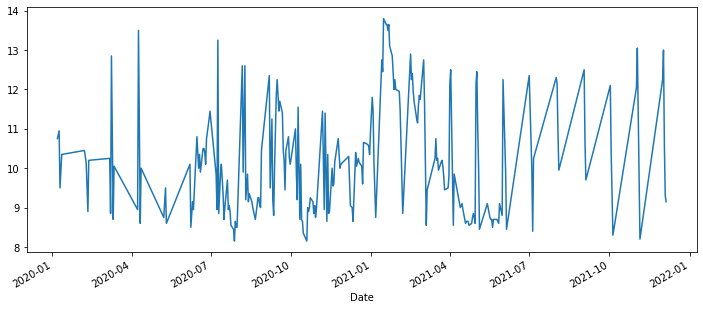

In [9]:
df['High'].plot(figsize=(12,5))

check stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print("1. ADF : ",dftest[0]);
    print("2. P-value : ",dftest[1]);
    print("3. Num. of lags : ",dftest[2]);
    print("4. Num. of observation used for ADF regression and critical values calculation :",dftest[3])
    print("5. critical values: ")
    for key,val in dftest[4].items():
        print("\t",key, ": ",val)

In [12]:
ad_test(df['High'])

1. ADF :  -2.8333257878475337
2. P-value :  0.053668837152057954
3. Num. of lags :  16
4. Num. of observation used for ADF regression and critical values calculation : 234
5. critical values: 
	 1% :  -3.4586084859607156
	 5% :  -2.873972159235721
	 10% :  -2.57339565928848


Figure out order of ARIMA model

In [14]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [15]:
stepwise_fit = auto_arima(df['High'],teace=True,suppress_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -141.817
Date:                Wed, 09 Jun 2021   AIC                            289.635
Time:                        23:17:50   BIC                            300.211
Sample:                             0   HQIC                           293.891
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4678      0.225      2.082      0.037       0.027       0.908
ar.L1          0.9548      0.021     46.268      0.000       0.914       0.995
sigma2         0.1795      0.009     20.690      0.000       0.163       0.197
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               594.16
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             1.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
from statsmodels.tsa.arima_model import ARIMA

split Data into training and testing 

In [17]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(251, 4)
(221, 4) (30, 4)


Train the model

In [18]:
model=ARIMA(train['High'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   High   No. Observations:                  221
Model:                     ARMA(1, 5)   Log Likelihood                -128.846
Method:                       css-mle   S.D. of innovations              0.431
Date:                Wed, 09 Jun 2021   AIC                            273.693
Time:                        23:24:09   BIC                            300.878
Sample:                             0   HQIC                           284.670
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3933      0.563     18.453      0.000       9.289      11.497
ar.L1.High     0.9462      0.028     34.223      0.000       0.892       1.000
ma.L1.High     0.0012      0.073      0.017      0.987      -0.142       0.145
ma.L2.High     0.0447      0.073      0.609      0.543      -0.099       0.189
ma.L3.High    -0.1614      0.077     -2.095      0.036      -0.312      -0.010
ma.L4.High     0.0703      0.062      1.128      0.259      -0.052       0.192
ma.L5.High     0.1723      0.073      2.375      0.018       0.030       0.315
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0568           +0.0000j            1.0568            0.0000
MA.1            1.1653           -0.7857j            1.4054           -0.0944
MA.2            1.1653           +0.7857j            1.4054            0.0944
MA.3           -0.5123           -1.2049j            1.3093           -0.3140
MA.4           -0.5123           +1.2049j            1.3093            0.3140
MA.5           -1.7138           -0.0000j            1.7138           -0.5000
-----------------------------------------------------------------------------
"""

Make predictions on test set

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
# print(pred)
pred.index=df.index[start:end+1]
print(pred)

Date
2021-04-26     8.572522
2021-04-27     8.601329
2021-04-28     8.742833
2021-04-29     8.806677
2021-04-30     8.850184
2021-03-05     8.933130
2021-04-05     9.011617
2021-05-05     9.085885
2021-06-05     9.156162
2021-07-05     9.222660
2021-10-05     9.285585
2021-11-05     9.345126
2021-12-05     9.401468
2021-05-14     9.454781
2021-05-17     9.505228
2021-05-18     9.552963
2021-05-19     9.598133
2021-05-20     9.640875
2021-05-21     9.681319
2021-05-24     9.719589
2021-05-25     9.755802
2021-05-26     9.790068
2021-05-27     9.822493
2021-05-28     9.853175
2021-05-31     9.882207
2021-01-06     9.909679
2021-02-06     9.935674
2021-03-06     9.960272
2021-04-06     9.983548
2021-07-06    10.005572
dtype: float64


<AxesSubplot:xlabel='Date'>

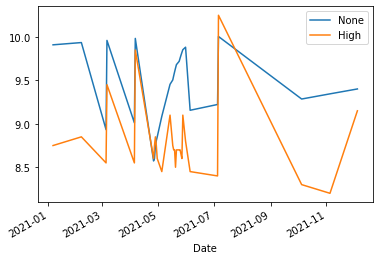

In [22]:
pred.plot(legend=True)
test['High'].plot(legend=True)

In [23]:
test['High'].mean()

8.791666666666664

In [25]:
 from math import sqrt
 from sklearn.metrics import mean_squared_error
 rmse=sqrt(mean_squared_error(test['High'],pred))
 print(rmse)

0.7837775198043097


In [26]:
model2=ARIMA(df['High'],order=(1,0,5))
model2=model2.fit()
df.tail()

,Open,High,Low,Close
Date,,,,
2021-01-06,8.70,8.75,8.45,8.50
2021-02-06,8.55,8.85,8.45,8.80
2021-03-06,8.85,9.45,8.80,9.35
2021-04-06,9.40,9.85,9.35,9.75
2021-07-06,10.00,10.25,9.95,10.10


for future prediction

In [53]:
index_future_dates=pd.date_range(start='2021-06-07',end='2021-07-07')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
print(pred)

2021-06-07    10.182284
2021-06-08    10.208230
2021-06-09    10.243083
2021-06-10    10.327703
2021-06-11    10.400077
2021-06-12    10.397989
2021-06-13    10.396006
2021-06-14    10.394122
2021-06-15    10.392334
2021-06-16    10.390635
2021-06-17    10.389021
2021-06-18    10.387489
2021-06-19    10.386034
2021-06-20    10.384651
2021-06-21    10.383339
2021-06-22    10.382092
2021-06-23    10.380908
2021-06-24    10.379784
2021-06-25    10.378716
2021-06-26    10.377701
2021-06-27    10.376738
2021-06-28    10.375823
2021-06-29    10.374954
2021-06-30    10.374129
2021-07-01    10.373345
2021-07-02    10.372601
2021-07-03    10.371894
2021-07-04    10.371223
2021-07-05    10.370585
2021-07-06    10.369979
2021-07-07    10.369404
Freq: D, Name: ARIMA predictions, dtype: float64


<AxesSubplot:>

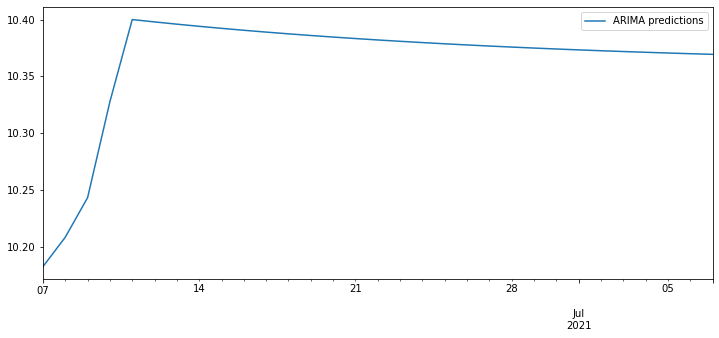

In [54]:
pred.plot(figsize=(12,5),legend=True)